# HR CHURN PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\MY PC\Desktop\HR_Data.csv')
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [3]:
df.shape

(8998, 18)

In [4]:
df.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

### There is no missing data in the given dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8998 non-null   int64  
 1   Candidate.Ref                8998 non-null   int64  
 2   DOJ.Extended                 8998 non-null   object 
 3   Duration.to.accept.offer     8998 non-null   int64  
 4   Notice.period                8998 non-null   int64  
 5   Offered.band                 8998 non-null   object 
 6   Pecent.hike.expected.in.CTC  8998 non-null   float64
 7   Percent.hike.offered.in.CTC  8998 non-null   float64
 8   Percent.difference.CTC       8998 non-null   float64
 9   Joining.Bonus                8998 non-null   object 
 10  Candidate.relocate.actual    8998 non-null   object 
 11  Gender                       8998 non-null   object 
 12  Candidate.Source             8998 non-null   object 
 13  Rex.in.Yrs        

In [6]:
df = df.drop(['SLNO' , 'Candidate.Ref'] , axis = 1)
df.head()
## SLNO & CANDIDATE.REF are columns with no impact on the dataset as these are just specific numbers assigned to the students.

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


# EDA

In [7]:
df["Status"] = df["Status"].map({"Joined" : 1 , "Not Joined" : 0})

In [8]:
df['Status'].value_counts()

## Imbalanced dataset. Resampling required.

1    7316
0    1682
Name: Status, dtype: int64

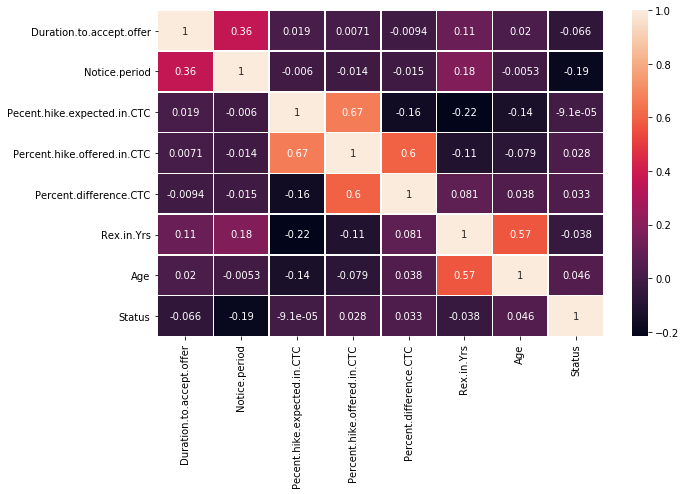

In [9]:
data = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(data , annot = True  , linewidth = 0.5)

#### The features, 'Pecent hike expected in CTC' , 'Percent hike offered in CTC' and 'Percent difference CTC' are showing multicollinearity. 

In [10]:
num_columns = list(df._get_numeric_data().columns)
all_columns = list(df.columns)

In [11]:
num_columns

['Duration.to.accept.offer',
 'Notice.period',
 'Pecent.hike.expected.in.CTC',
 'Percent.hike.offered.in.CTC',
 'Percent.difference.CTC',
 'Rex.in.Yrs',
 'Age',
 'Status']

In [12]:
cat_columns = []
for i in all_columns:
    if i not in num_columns:
        cat_columns.append(i)
print(cat_columns)

['DOJ.Extended', 'Offered.band', 'Joining.Bonus', 'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'LOB', 'Location']


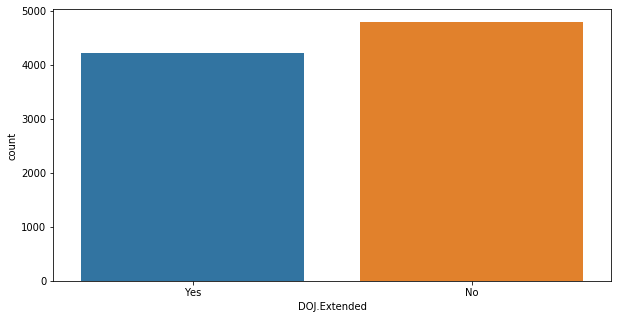

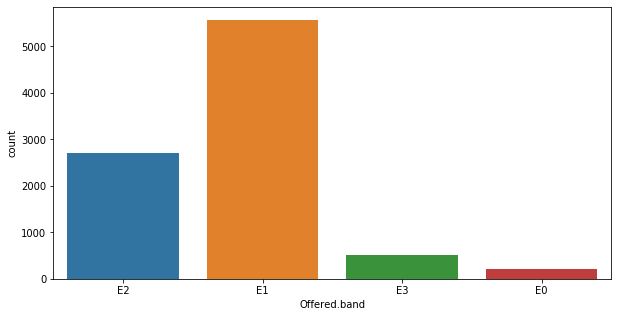

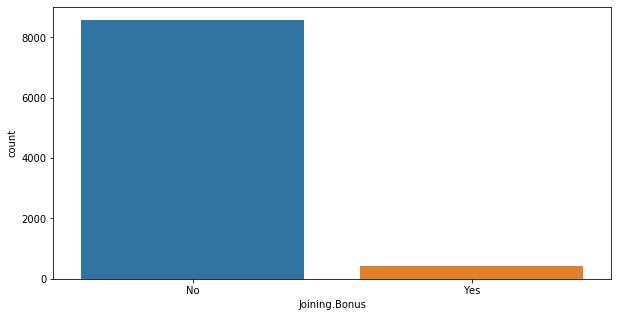

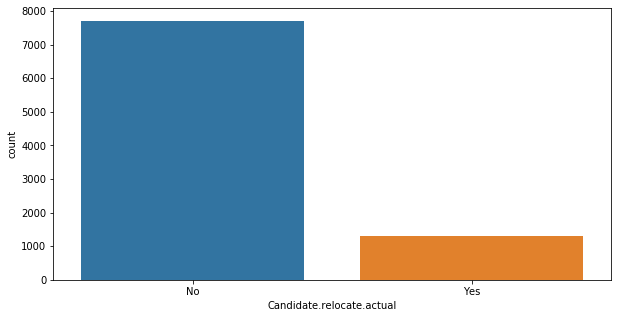

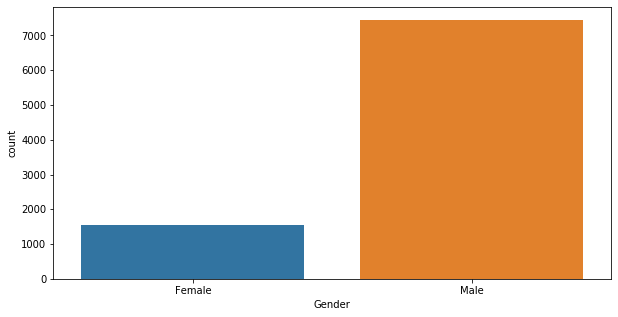

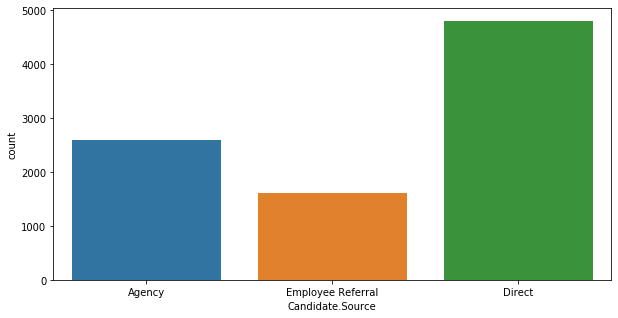

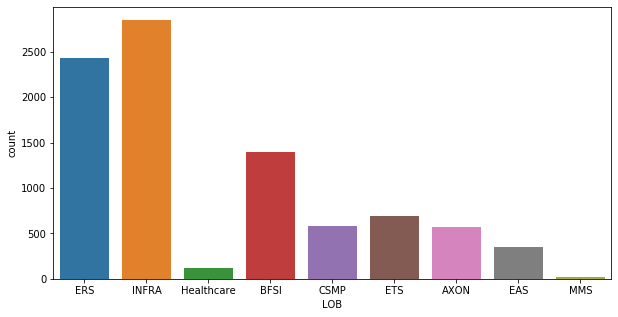

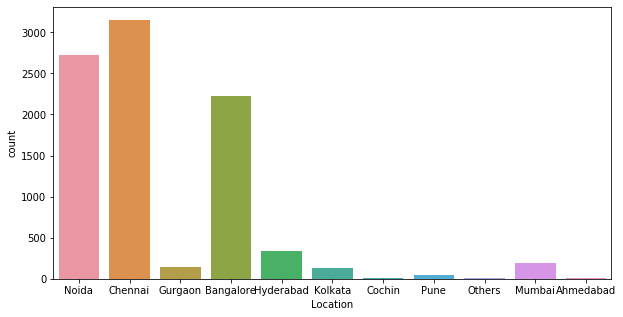

In [13]:
for i in cat_columns:
    plt.figure(figsize = (10,5))
    sns.countplot(x = i , data = df)
    plt.show()

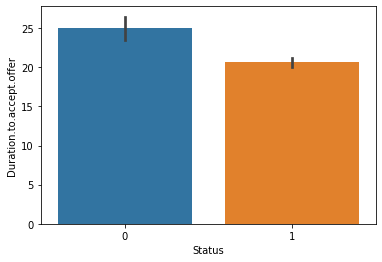

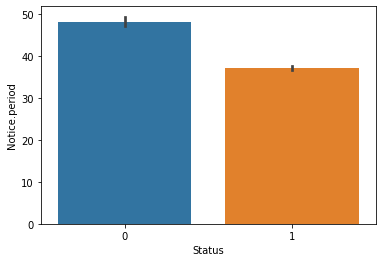

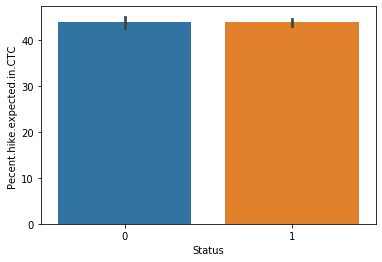

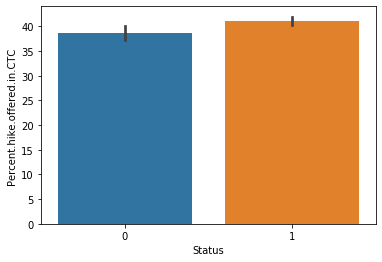

In [14]:
for i in num_columns[:4]:
    sns.barplot(df["Status"] , df[i])
    plt.show()

# Analysis from the above plots

1. Most of the candidates didn't ask for date of joining extension.
2. Most of the candidates are offered 'E1' band in the interview.
3. Most of the candidates were not given any joining bonus.
4. Most of the candidates has not relocated to any new city.
5. Most of the candidates are male.
6. Most of the candidates applied directly for the interviews followed by 'Agency'.
7. Line of business(LOB) offered was 'INFRA' in most of the cases followed by 'ERS' and 'BFSI'.
8. Most of the candidates got placed in Chennai followed by Noida & Bangalore.
9. Most candidates accepted the offered job.
10. Candidates who joined and not joined the company has expected same percentage of hike in CTC but candidates who didn't join the company were offered a lesser percentage hike in CTC as compared to those who joined.
11. Candidates those who didn't join were offered more duration comparatively to join the firm.
12. Notice period was high comparatively for the candidates who turned down the job offer.

# DATA PREPROCESSING

In [15]:
df_num = df[num_columns] 
df_cat = df[cat_columns]

In [16]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()

In [17]:
df_cat_new = df_cat.apply(lb_encode.fit_transform)

In [18]:
df_new = df_num.join(df_cat_new)
df_new.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,Status,DOJ.Extended,Offered.band,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,LOB,Location
0,14,30,-20.79,13.16,42.86,7,34,1,1,2,0,0,0,0,4,8
1,18,30,50.00,320.00,180.00,8,34,1,0,2,0,0,1,2,7,2
2,3,45,42.84,42.84,0.00,4,27,1,0,2,0,0,1,0,7,8
3,26,30,42.84,42.84,0.00,4,34,1,0,2,0,0,1,2,7,8
4,1,120,42.59,42.59,0.00,6,34,1,1,2,0,1,1,2,7,8


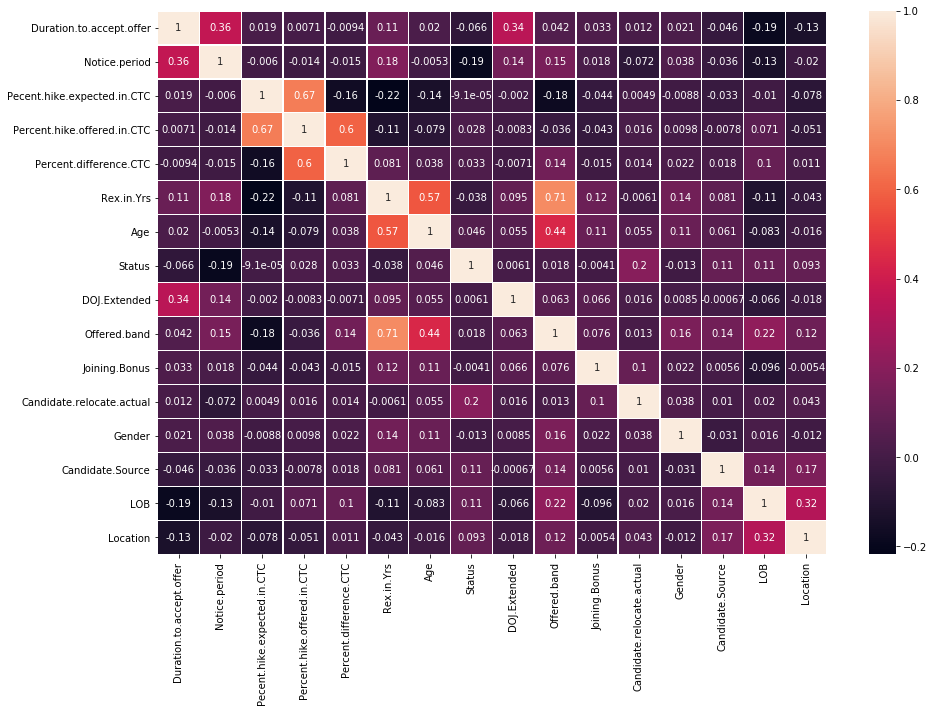

In [19]:
plt.figure(figsize = (15,10))
sns.heatmap(df_new.corr() , annot = True  , linewidth = 0.5)

### Checking for multicollinearity with VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
X_data = df_new.drop(["Status"] , axis = 1)
Y_data = df["Status"]

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
x_stand = sc.fit_transform(X_data)

In [25]:
vif = pd.DataFrame()
vif["Index"] = X_data.keys()
vif["Score"] = [variance_inflation_factor(x_stand,i) for i in range(len(X_data.keys()))]
vif.set_index(["Index"] , inplace = True)

In [26]:
vif

,Score
Index,
Duration.to.accept.offer,1.322250
Notice.period,1.229388
Pecent.hike.expected.in.CTC,16.576716
Percent.hike.offered.in.CTC,25.031338
Percent.difference.CTC,14.182035
Rex.in.Yrs,2.800855
Age,1.533221
DOJ.Extended,1.141148
Offered.band,2.558877


#### We can see high VIF in case of 'Pecent hike expected in CTC' , 'Percent hike offered in CTC' and 'Percent difference CTC'. Hence 'Pecent hike expected in CTC' & 'Percent difference CTC' are dropped.

In [27]:
df_new = df_new.drop(["Pecent.hike.expected.in.CTC" , "Percent.difference.CTC"] , axis = 1)
df_new.head()

,Duration.to.accept.offer,Notice.period,Percent.hike.offered.in.CTC,Rex.in.Yrs,Age,Status,DOJ.Extended,Offered.band,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,LOB,Location
0,14,30,13.16,7,34,1,1,2,0,0,0,0,4,8
1,18,30,320.00,8,34,1,0,2,0,0,1,2,7,2
2,3,45,42.84,4,27,1,0,2,0,0,1,0,7,8
3,26,30,42.84,4,34,1,0,2,0,0,1,2,7,8
4,1,120,42.59,6,34,1,1,2,0,1,1,2,7,8


In [28]:
x_data = df_new.drop(["Status"] , axis = 1)
y_data = df["Status"]

# DATA RESAMPLING

In [29]:
y_data.value_counts()

1    7316
0    1682
Name: Status, dtype: int64

##### We can see that the data is imbalanced. Hence, resampling with replacement has been opted.

In [30]:
from sklearn.utils import resample
data_majority = df_new[df_new["Status"] == 1]
data_minority = df_new[df_new["Status"] == 0]

In [31]:
data_minority_resampled = resample(data_minority , n_samples = 7316 , replace = True , random_state = 42)

In [32]:
df1 = pd.concat([data_majority , data_minority_resampled])

In [33]:
X = df1.drop(["Status"] , axis = 1)
Y = df1["Status"]

In [34]:
Y.value_counts()

1    7316
0    7316
Name: Status, dtype: int64

##### As we can see, the dataset is balanced now.

# MODEL BUILDING

## Self-Analyzed Variables

### Random Forest Classifier

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score

In [36]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , train_size = 0.7 , random_state = 42)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10242, 13)
(4390, 13)
(10242,)
(4390,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
grid = {'n_estimators' : np.arange(40,50) , 'max_leaf_nodes' : np.arange(20,30) , 'max_depth' : np.arange(10,15) , 
        'max_features' : np.array([10,11,12,13])}

In [39]:
rfc = RandomForestClassifier(random_state = 1)
rfc1 = RandomizedSearchCV(rfc, grid, n_iter = 100 , cv = 5)

In [40]:
rfc1.fit(x_train, y_train)
y_predict = rfc1.predict(x_test)
acc = accuracy_score(y_test,y_predict)

In [ ]:
print("Tuned hyperparameter : {}".format(rfc1.best_params_)) 
print()
print("The accuracy score of the model is {}".format(acc * 100) , "%")
print()
print("The roc_auc score of the model is {}".format(roc_auc_score(y_test , y_predict) * 100) , "%")

In [42]:
## USING THE ABOVE COMPUTED HYPER-PARAMETRES

rfc = RandomForestClassifier(n_estimators = 42, max_leaf_nodes = 29, max_depth = 14 , max_features = 10 , random_state = 1)
rfc.fit(x_train , y_train)
print("The accuracy score is : " , accuracy_score(y_test , rfc.predict(x_test)) * 100 , "%")
print()
print("The roc_auc score is : " , roc_auc_score(y_test , rfc.predict(x_test)) * 100 , "%")

The accuracy score is :  70.82004555808656 %

The roc_auc score is :  70.79624122201797 %


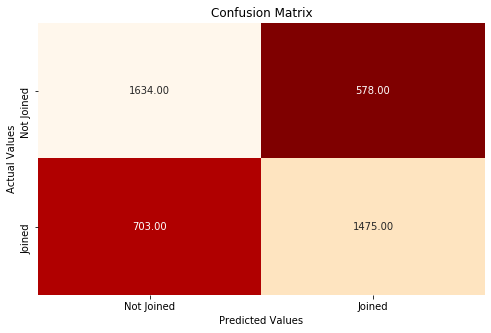

In [43]:
cf = confusion_matrix(y_test , rfc.predict(x_test))
plt.figure(figsize = (8,5))
sns.heatmap(np.array([cf[0] , cf[1]]) , annot = True , fmt='.2f', cmap = "OrRd_r" , cbar=False ,
            xticklabels=['Not Joined','Joined'],yticklabels=['Not Joined','Joined'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Features Vs. Importance')

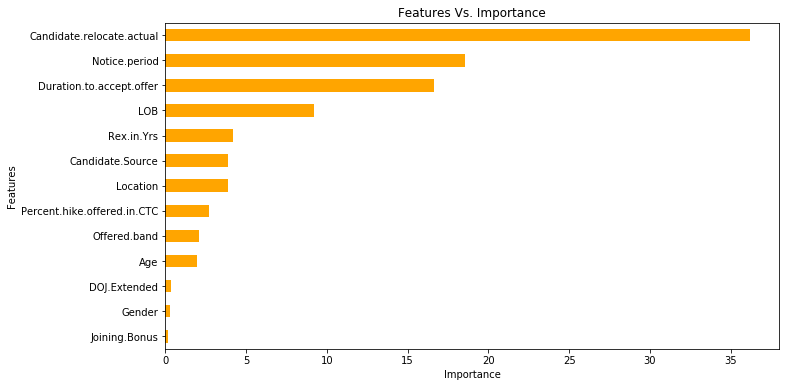

In [44]:
data_frame = pd.DataFrame()
data_frame['importance'] = rfc.feature_importances_ * 100
data_frame['features'] = x_train.columns
data_frame.set_index('features' , inplace = True)
data_frame.sort_values(by = ["importance"] , ascending = True , inplace = True)
data_frame.importance.plot(kind = 'barh' , figsize = (11,6) , color = 'orange')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Features Vs. Importance')

### K-Neighbors Classifier

In [45]:
grid1 = {'n_neighbors': np.arange(3,20) , 'p' : np.arange(1,10)}
knn = KNeighborsClassifier(metric='minkowski')
knn1 = GridSearchCV(knn, grid1, cv = 10)
knn1.fit(x_train, y_train)
y_predict1 = knn1.predict(x_test)
acc1 = accuracy_score(y_test,y_predict1)

In [46]:
print("Tuned hyperparameter : {}".format(knn1.best_params_)) 
print()
print("The accuracy score of the model is {}".format(acc1 * 100) , "%")
print()
print("The roc_auc score of the model is {}".format(roc_auc_score(y_test , y_predict1) * 100) , "%")

Tuned hyperparameter : {'n_neighbors': 3, 'p': 1}

The accuracy score of the model is 78.29157175398633 %

The roc_auc score of the model is 78.20717033893098 %


In [47]:
## USING THE ABOVE COMPUTED HYPER-PARAMETRE

knn = KNeighborsClassifier(n_neighbors = 3 , p=1 , metric='minkowski')
knn.fit(x_train , y_train)
print("The accuracy score is : " , accuracy_score(y_test , knn.predict(x_test)) * 100 , "%")
print()
print("The roc_auc score is : " , roc_auc_score(y_test , knn.predict(x_test)) * 100 , "%")

The accuracy score is :  78.29157175398633 %

The roc_auc score is :  78.20717033893098 %


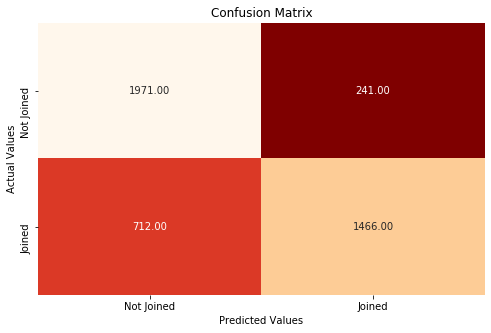

In [48]:
cf0 = confusion_matrix(y_test , knn.predict(x_test))
plt.figure(figsize = (8,5))
sns.heatmap(np.array([cf0[0] , cf0[1]]) , annot = True , fmt='.2f', cmap = "OrRd_r" , cbar=False ,
            xticklabels=['Not Joined','Joined'],yticklabels=['Not Joined','Joined'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)
print("The accuracy score is : " , accuracy_score(y_test , lr.predict(x_test)) * 100 , "%")
print()
print("The roc_auc score is : " , roc_auc_score(y_test , lr.predict(x_test)) * 100 , "%")

The accuracy score is :  65.80865603644646 %

The roc_auc score is :  65.76302645059837 %


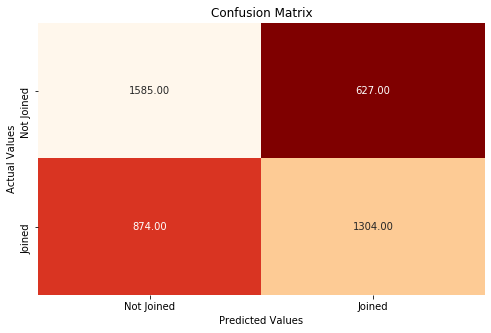

In [50]:
cf1 = confusion_matrix(y_test , lr.predict(x_test))
plt.figure(figsize = (8,5))
sns.heatmap(np.array([cf1[0] , cf1[1]]) , annot = True , fmt='.2f', cmap = "OrRd_r" , cbar=False ,
            xticklabels=['Not Joined','Joined'],yticklabels=['Not Joined','Joined'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Features Vs. Importance')

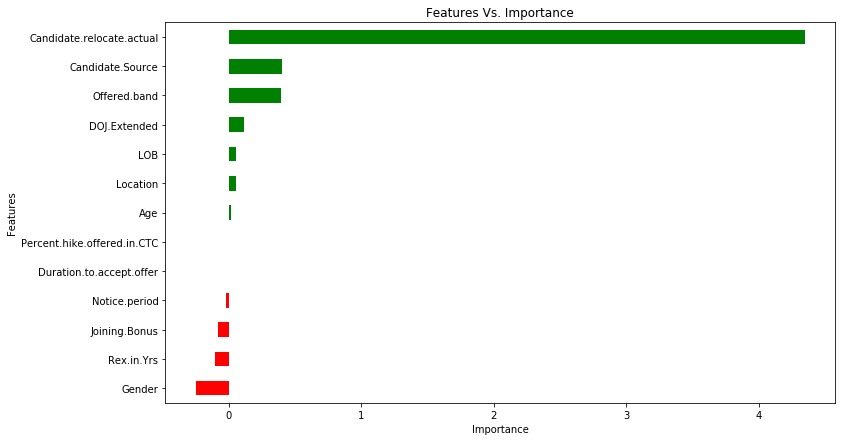

In [51]:
frame = pd.DataFrame()
frame['Features'] = x_train.columns
frame['Importance'] = lr.coef_[0]
frame['positive'] = frame['Importance'] > 0
frame.set_index("Features" , inplace = True)
frame.sort_values(by = ["Importance"] , ascending = True , inplace = True)
frame.Importance.plot(kind = 'barh' , figsize=(12, 7), color = frame.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance')
plt.title("Features Vs. Importance")

## RFE-Based Variables

In [52]:
from sklearn.feature_selection import RFE

In [53]:
rfe = RFE(lr , 10)
rfe.fit(x_train , y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [54]:
new_columns = x_train.columns[rfe.support_]
new_columns

Index(['Rex.in.Yrs', 'Age', 'DOJ.Extended', 'Offered.band', 'Joining.Bonus',
       'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'LOB',
       'Location'],
      dtype='object')

### Random Forest Classifier

In [55]:
rfc0 = RandomForestClassifier(n_estimators = 42, max_leaf_nodes = 29, max_depth = 14 , max_features = 10 , random_state = 1)
rfc0.fit(x_train[new_columns] , y_train)
print("The accuracy score is : " , accuracy_score(y_test , rfc0.predict(x_test[new_columns])) * 100 , "%")
print()
print("The roc_auc score is : " , roc_auc_score(y_test , rfc0.predict(x_test[new_columns])) * 100 , "%")

The accuracy score is :  66.97038724373576 %

The roc_auc score is :  66.85125544446602 %


### K-Neighbors Classifier

In [57]:
knn0 = KNeighborsClassifier(n_neighbors = 3 , p=1 , metric='minkowski')
knn0.fit(x_train[new_columns] , y_train)
print("The accuracy score is : " , accuracy_score(y_test , knn0.predict(x_test[new_columns])) * 100 , "%")
print()
print("The roc_auc score is : " , roc_auc_score(y_test , knn0.predict(x_test[new_columns])) * 100 , "%")

The accuracy score is :  74.69248291571753 %

The roc_auc score is :  74.60151407216999 %


### Logistic Regression

In [58]:
lr0 = LogisticRegression()
lr0.fit(x_train[new_columns] , y_train)
print("The accuracy score is : " , accuracy_score(y_test , lr0.predict(x_test[new_columns])) * 100 , "%")
print()
print("The roc_auc score is : " , roc_auc_score(y_test , lr0.predict(x_test[new_columns])) * 100 , "%")

The accuracy score is :  64.28246013667426 %

The roc_auc score is :  64.18469173072165 %


# CONCLUSION

In [59]:
print("Random Forest Classifier Results :")
print()
print("The accuracy score is : " , accuracy_score(y_test , rfc.predict(x_test)) * 100 , "%")
print("The roc_auc score is : " , roc_auc_score(y_test , rfc.predict(x_test)) * 100 , "%")
print()
print()
print("K-Neighbors Classifier Results :")
print()
print("The accuracy score is : " , accuracy_score(y_test , knn.predict(x_test)) * 100 , "%")
print("The roc_auc score is : " , roc_auc_score(y_test , knn.predict(x_test)) * 100 , "%")
print()
print()
print("Logistic Regression Results :")
print()
print("The accuracy score is : " , accuracy_score(y_test , lr.predict(x_test)) * 100 , "%")
print("The roc_auc score is : " , roc_auc_score(y_test , lr.predict(x_test)) * 100 , "%")

Random Forest Classifier Results :

The accuracy score is :  70.82004555808656 %
The roc_auc score is :  70.79624122201797 %


K-Neighbors Classifier Results :

The accuracy score is :  78.29157175398633 %
The roc_auc score is :  78.20717033893098 %


Logistic Regression Results :

The accuracy score is :  65.80865603644646 %
The roc_auc score is :  65.76302645059837 %


1. Accuracy and ROC_AUC score in case of "Self-analyzed variables" is more than "RFE-based variables" for all the 3 models.
2. Accuracy and ROC-AUC score of "K-Neighbors classifier" is the highest among all the 3 models.
3. "Logistic regression" model gave the least scores.
4. "Candidate Relocate Actual" is the most important feature in both cases of Random forest classifier and Logistic regression.
5. The confusion matrix of "K-Neighbors classifier" has been the best amont all the 3 models.